
# Generate plots for GLAM models



In [2]:
import glam
import pandas as pd
import numpy as np
import os.path

import matplotlib.pyplot as plt
import pymc3 as pm
np.random.seed(23) # from random.org

# 1. FREE TRIALS

In [86]:
# Load data
sufix = 'exp2_2ndChoice_Free'
data = pd.read_csv('data/glam_data/CP2020_GlamData_CP2020_'+sufix+'.csv')
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()


# Split data
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1122 trials) and test (1122 trials) sets...


In [87]:
glam_full = glam.GLAM(train_data)

# if individual

glam_full.type = "individual"

# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('Results/Predictions/GlamCP2020_indiv_GazeBias_'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/GlamCP2020_indiv_GazeBias_'+sufix+'.csv'), index=False)
else:
    print('  Found old  full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/GlamCP2020_indiv_GazeBias_'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1122 trials) with new data (1122 trials)...
  Found old  full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,0.0,0.0,0.0,1.0,2619.0,4.8,0.396963,5.0,0.603037
1,0.0,0.0,1.0,1.0,1748.0,4.8,0.396963,5.0,0.603037
2,0.0,0.0,2.0,1.0,4304.0,4.8,0.396963,5.0,0.603037
3,0.0,0.0,3.0,1.0,3287.0,4.8,0.396963,5.0,0.603037
4,0.0,0.0,4.0,1.0,1200.0,4.8,0.396963,5.0,0.603037


(array([ 10.,  25.,  52., 170., 398., 287., 120.,  40.,  13.,   7.]),
 array([0.07042983, 0.15753683, 0.24464382, 0.33175082, 0.41885782,
        0.50596482, 0.59307181, 0.68017881, 0.76728581, 0.85439281,
        0.9414998 ]),
 <BarContainer object of 10 artists>)

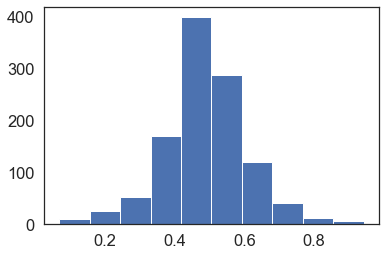

In [88]:
plt.hist(np.unique(test_data.gaze_0))

In [89]:
## print('Close Figure to continue...')
## glam.plots_pretty_GLAM.plot_fit(test_data, [glam_full.prediction], color_data = '#f18f5e',label1 = 'Free', label2 = 'GLAM simulations');
## #plt.savefig(str('SavedFigures/PF2019GLAM_simulations_More.png'), dpi = 200 )
## 
## plt.show()
## # Shown dots containing the mean observed for that segment bin for those participants

In [90]:
test_data

,subject,trial,choice,rt,item_value_0,item_value_1,gaze_0,gaze_1
1,1,24,0,2527.0,4.8,5.0,0.396963,0.603037
3,1,27,1,5497.0,4.7,5.0,0.534941,0.465059
5,1,29,0,3218.0,4.8,5.0,0.574559,0.425441
7,1,33,1,13762.0,4.7,5.0,0.432166,0.567834
9,1,36,1,17899.0,5.2,5.0,0.522491,0.477509
...,...,...,...,...,...,...,...,...
117,26,199,1,2396.0,4.7,5.0,0.463009,0.536991
119,26,202,0,9428.0,5.3,5.0,0.536637,0.463363
121,26,204,1,2434.0,5.0,5.5,0.501827,0.498173
123,26,208,0,1582.0,5.0,4.3,0.532447,0.467553


In [ ]:
print('Close Figure to continue...')
glam.plots_pretty_GLAM_left2.plot_fit(test_data, [glam_full.prediction], color_data = '#f18f5e',label1 = 'Model fit', label2 = 'Model simulations', legend_label = ' Free condition');
#plt.savefig(str('SavedFigures/PF2019GLAM_simulations_More.png'), dpi = 200 )

plt.show()
# Shown dots containing the mean observed for that segment bin for those participants

In [ ]:
gaze_dif = glam_full.prediction.gaze_0 - glam_full.prediction.gaze_1
gaze_dif.hist()

# 2. FREE TRIALS - 3 Bins

In [93]:
# Load data
sufix = 'exp2_2ndChoice_Free_Gaze3Bins'

data = pd.read_csv('data/glam_data/CP2020_GlamData_'+sufix+'.csv')
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()


# Split data
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1122 trials) and test (1122 trials) sets...


In [94]:
glam_full = glam.GLAM(train_data)

# if individual

glam_full.type = "individual"

sufix = 'exp2_2ndChoice_Free_Gaze3Bins'

# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('Results/Predictions/GlamCP2020_indiv_GazeBias_'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/GlamCP2020_indiv_GazeBias_'+sufix+'.csv'), index=False)
else:
    print('  Found old  full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/GlamCP2020_indiv_GazeBias_'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1122 trials) with new data (1122 trials)...
  Found old  full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,0.0,0.0,0.0,1.0,2592.0,4.8,0.25,5.0,0.75
1,0.0,0.0,1.0,1.0,1688.0,4.8,0.25,5.0,0.75
2,0.0,0.0,2.0,1.0,4388.0,4.8,0.25,5.0,0.75
3,0.0,0.0,3.0,1.0,3298.0,4.8,0.25,5.0,0.75
4,0.0,0.0,4.0,1.0,1134.0,4.8,0.25,5.0,0.75


In [95]:
## print('Close Figure to continue...')
## glam.plots_pretty_GLAM.plot_fit(test_data, [glam_full.prediction], color_data = '#f18f5e',label1 = 'Free', label2 = 'GLAM simulations');
## #plt.savefig(str('SavedFigures/PF2019GLAM_simulations_More.png'), dpi = 200 )
##  
## plt.show()
## # Shown dots containing the mean observed for that segment bin for those participants

Close Figure to continue...




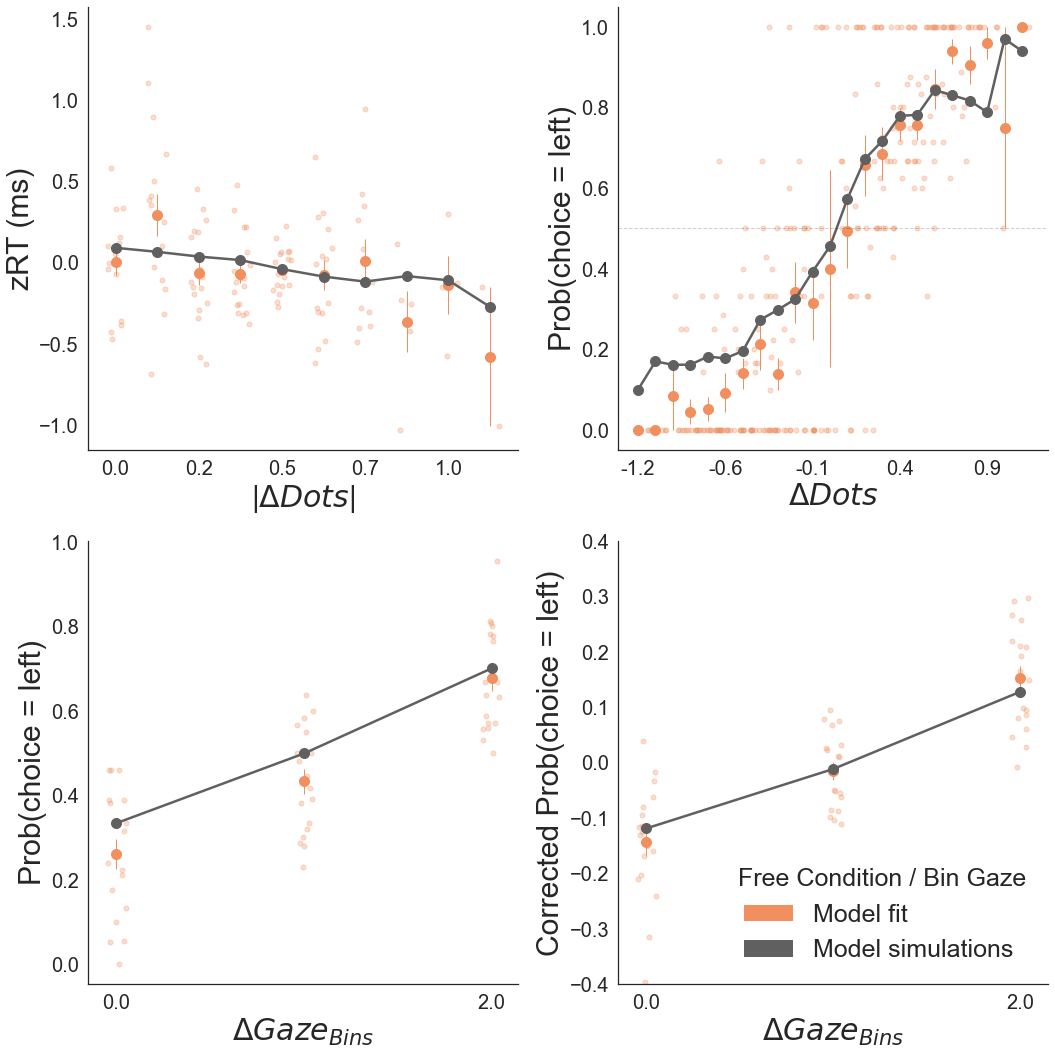

In [96]:
print('Close Figure to continue...')
glam.plots_pretty_GLAM_left2.plot_fit(test_data, [glam_full.prediction], color_data = '#f18f5e',label1 = 'Model fit', label2 = 'Model simulations', legend_label = ' Free Condition / Bin Gaze');
#plt.savefig(str('SavedFigures/PF2019GLAM_simulations_More.png'), dpi = 200 )

plt.show()
# Shown dots containing the mean observed for that segment bin for those participants

# 3. FIXED TRIALS

In [3]:
# Load data
sufix = 'exp2_2ndChoice_Fixed'
data = pd.read_csv('data/glam_data/CP2020_GlamData_CP2020_'+sufix+'.csv')
# Subset only necessary columns
data = data[['subject', 'trial', 'choice', 'rt',
         'item_value_0', 'item_value_1',
         'gaze_0', 'gaze_1']]
data.head()


# Split data
train_data = pd.DataFrame()
test_data = pd.DataFrame()

for subject in data.subject.unique():
    subject_data = data[data['subject'] == subject].copy().reset_index(drop=True)
    n_trials = len(subject_data)
    
    subject_train = subject_data.iloc[np.arange(0, n_trials, 2)].copy()
    subject_test = subject_data.iloc[np.arange(1, n_trials, 2)].copy()

    test_data = pd.concat([test_data, subject_test])
    train_data = pd.concat([train_data, subject_train])

#test_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_test'+sufix+'.csv'))
#train_data.to_csv(str('data/FF2018_data/GlamDataFF2018_preprocessed_train'+sufix+'.csv'))

print('Split data into training ({} trials) and test ({} trials) sets...'.format(len(train_data), len(test_data)))

Split data into training (1129 trials) and test (1127 trials) sets...


In [4]:
glam_full = glam.GLAM(train_data)

# if individual

glam_full.type = "individual"

# Predictions
print('Predicting test set data using full GLAM...')
glam_full.exchange_data(test_data)

if not os.path.exists(str('Results/Predictions/GlamCP2020_indiv_GazeBias_'+sufix+'.csv')):
    glam_full.predict(n_repeats=50)
    glam_full.prediction.to_csv(str('results/predictions/GlamCP2020_indiv_GazeBias_'+sufix+'.csv'), index=False)
else:
    print('  Found old  full GLAM predictions in "results/predictions". Skipping prediction...')
    glam_full.prediction = pd.read_csv(str('results/predictions/GlamCP2020_indiv_GazeBias_'+sufix+'.csv'))

glam_full.prediction.head()

Predicting test set data using full GLAM...
Replaced attached data (1129 trials) with new data (1127 trials)...
  Found old  full GLAM predictions in "results/predictions". Skipping prediction...


,subject,trial,repeat,choice,rt,item_value_0,gaze_0,item_value_1,gaze_1
0,0.0,0.0,0.0,1.0,2458.0,5.0,0.75,4.6,0.25
1,0.0,0.0,1.0,0.0,1093.0,5.0,0.75,4.6,0.25
2,0.0,0.0,2.0,0.0,2728.0,5.0,0.75,4.6,0.25
3,0.0,0.0,3.0,1.0,2067.0,5.0,0.75,4.6,0.25
4,0.0,0.0,4.0,0.0,1760.0,5.0,0.75,4.6,0.25


In [5]:
# print('Close Figure to continue...')
# glam.plots_pretty_GLAM.plot_fit(test_data, [glam_full.prediction], color_data = '#2a8bba',label1 = 'Fixed', label2 = 'Simulations');
# #plt.savefig(str('SavedFigures/PF2019GLAM_simulations_More.png'), dpi = 200 )
# 
# plt.show()
# # Shown dots containing the mean observed for that segment bin for those participants

Close Figure to continue...




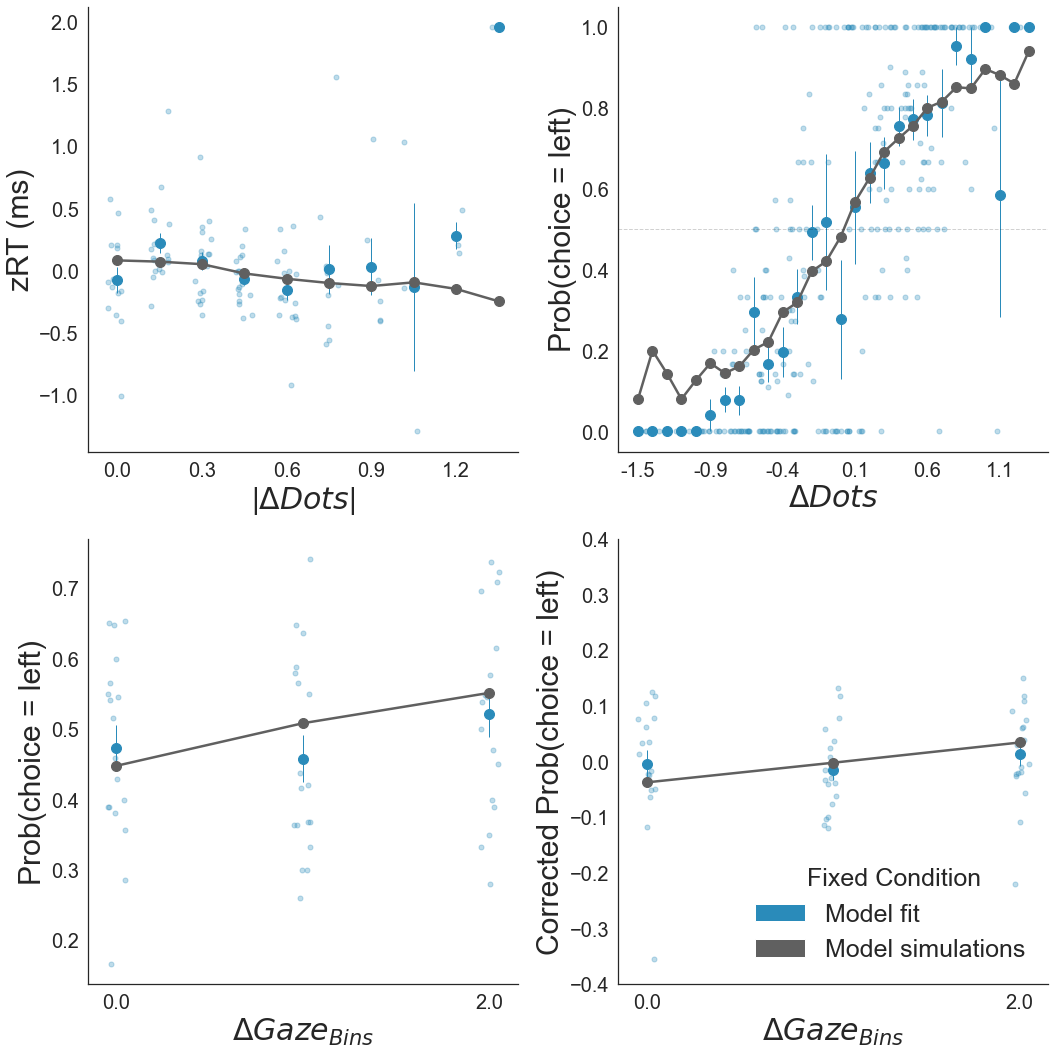

In [7]:
print('Close Figure to continue...')
glam.plots_pretty_GLAM_left2.plot_fit(test_data, [glam_full.prediction], color_data = '#2a8bba',label1 = 'Model fit', label2 = 'Model simulations', legend_label = ' Fixed Condition');
#plt.savefig(str('SavedFigures/PF2019GLAM_simulations_More.png'), dpi = 200 )

plt.show()
# Shown dots containing the mean observed for that segment bin for those participants